# Cold War Simulation Analysis
## Experiment 3 -- Replication model, 1948 COW data

In [1]:
import copy
import pickle
import random
from collections import defaultdict, namedtuple, Counter
from itertools import combinations, permutations
import os

import numpy as np
import scipy.stats

import pandas as pd
import networkx as nx
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

# Loading original data

In [2]:
model_data = pd.read_csv("ColdWarActors_1948.csv")
#model_data.Position = (model_data.Position + 100)/200

In [3]:
model_data.head()

,Unnamed: 0,Capability,Country,Position
0,0,0.294660,United States of America,1.000000e+00
1,1,0.164000,Russia,-3.439353e-16
2,2,0.115055,China,5.724034e-01
3,3,0.075426,United Kingdom,5.368582e-01
4,4,0.052450,India,5.632982e-01


# Data serialization

In [4]:
class Model_Output:
    def __init__(self, model):
        '''
        Store data from model run.
        '''
        self.agent_vars = model.datacollector.get_agent_vars_dataframe()
        self.model_vars = model.datacollector.get_model_vars_dataframe()
        self.log = model.log

In [5]:
with open("data_output/ColdWar_Experiment3_1.pickle", "rb") as f:
    model_runs = pickle.load(f)

In [6]:
len(model_runs)

1000

# Analyzing median positions

In [7]:
all_dfs = []
for i, model in enumerate(model_runs):
    df = model.model_vars.copy()
    df.reset_index(inplace=True)
    df.rename(columns={"index": "Step"}, inplace=True)
    df["Iteration"] = i
    all_dfs.append(df)
results = pd.concat(all_dfs)

In [8]:
results.tail()

,Step,Mean,Median,Iteration
20,20,0.452184,0.563298,999
21,21,0.661955,0.563298,999
22,22,0.541689,0.563298,999
23,23,0.672649,0.563298,999
24,24,0.595658,0.563298,999


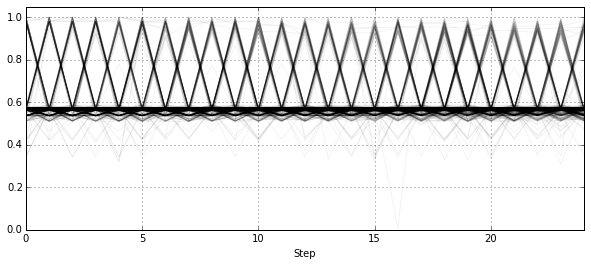

In [9]:
# Plot all runs
fig, ax = plt.subplots(figsize=(10, 4))
for i, group in results.groupby("Iteration"):
    group.plot(x="Step", y="Median", color='k', alpha=0.05, ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.grid(True)

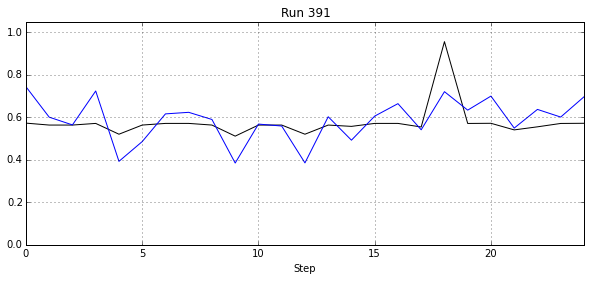

In [10]:
# Pick one trace at random
fig, ax = plt.subplots(figsize=(10, 4))
i = random.randint(0, 999)
subset = results[results.Iteration==i]
subset.plot(x="Step", y="Median", color='k', ax=ax, legend=False)
subset.plot(x="Step", y="Mean", color='b', ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_title("Run " + str(i))
ax.grid(True)

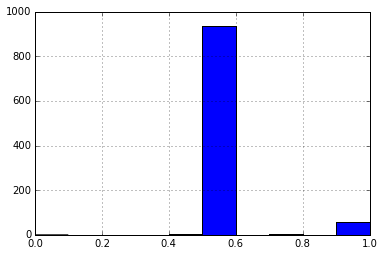

In [11]:
results[results.Step==24]["Median"].hist(bins=np.linspace(0, 1, 11))

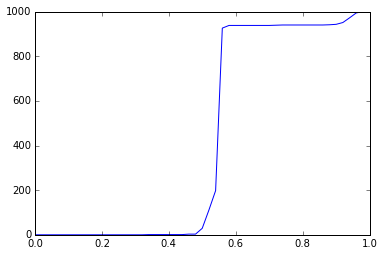

In [12]:
values, base = np.histogram(results[results.Step==24]["Median"], bins=np.linspace(0,1,51))
cdf = np.cumsum(values)
plt.plot(base[:-1], cdf)

In [13]:
import pyobjclipboard
pyobjclipboard.copy_object((base, cdf))

**Look at only runs where the US "wins".**

In [14]:
# Get iterations where US wins
us_win = results[(results.Step==24) & (results.Median>0.8)]["Iteration"].unique()

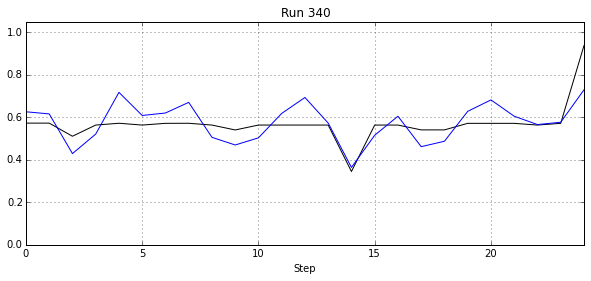

In [15]:
# Plot a random US victory
fig, ax = plt.subplots(figsize=(10, 4))
i = random.choice(us_win)
subset = results[results.Iteration==i]
subset.plot(x="Step", y="Median", color='k', ax=ax, legend=False)
subset.plot(x="Step", y="Mean", color='b', ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_title("Run " + str(i))
ax.grid(True)

IndexError: Cannot choose from an empty sequence

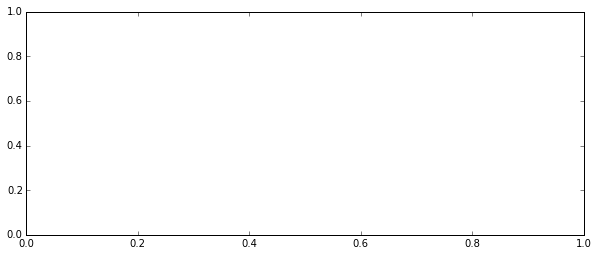

In [16]:
# Get a random instantiation where USSR wins
ussr_win = results[(results.Step==24) & (results.Median<0.2)]["Iteration"].unique()
fig, ax = plt.subplots(figsize=(10, 4))
i = random.choice(ussr_win)
subset = results[results.Iteration==i]
subset.plot(x="Step", y="Median", color='k', ax=ax, legend=False)
subset.plot(x="Step", y="Mean", color='b', ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_title("Run " + str(i))
ax.grid(True)

In [ ]:
len(ussr_win)

## Deep dive into one run

In [ ]:
run_choice = 224
fig, ax = plt.subplots(figsize=(10, 4))
subset = results[results.Iteration==run_choice]
subset.plot(x="Step", y="Median", color='k', ax=ax, legend=False)
subset.plot(x="Step", y="Mean", color='b', ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_title("Run " + str(i))
ax.grid(True)

In [ ]:
m = model_runs[run_choice]

In [ ]:
agent_positions = m.agent_vars.copy()
agent_positions.reset_index(inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

for i, group in agent_positions.groupby("AgentID"):
    group.plot(x="Step", y="Position", ax=ax, legend=False)

ax.set_ylim(0, 1.05)

In [ ]:
fig = plt.figure(figsize=(15, 15))
fig_num = 1

for name, group in agent_positions.groupby("AgentID"):
    ax = fig.add_subplot(6,6,fig_num)
    group.plot(x="Step", y="Position", ax=ax, legend=False)
    ax.set_title(name)
    ax.set_ylim(0, 1.05)
    fig_num += 1

fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(15, 15))
fig_num = 1

for name, group in agent_positions.groupby("AgentID"):
    ax = fig.add_subplot(6,6,fig_num)
    group.plot(x="Step", y="Position", ax=ax, legend=False)
    y0, y1 = ax.get_ylim()
    ax.vlines(7, y0, y1, linestyles='--')
    ax.set_title(name)
    # ax.set_ylim(0, 1.05)
    fig_num += 1
    

fig.tight_layout()

In [ ]:
fig.savefig("Output.png", dpi=300)

In [ ]:
m.log.get_events(action="Attack")

In [ ]:
# Average unweighted postion

In [ ]:
average_position = agent_positions.groupby("Step").aggregate("mean")

In [ ]:
average_position.plot()

# Agent position analysis

In [ ]:
all_dfs = []
for i, model in enumerate(model_runs):
    df = model.agent_vars.copy()
    df.reset_index(inplace=True)
    df["Iteration"] = i
    all_dfs.append(df)
agent_positions = pd.concat(all_dfs)

## How far do agents end up from their starting position?

In [ ]:
end_positions = agent_positions[agent_positions.Step==24]\
    .groupby("AgentID")["Position"].aggregate([np.mean, np.std])

end_positions = end_positions.rename(columns={"mean": "EndPos_mean",
                             "std": "EndPos_std"})

In [ ]:
end_positions = end_positions.merge(model_data, left_index=True, right_on="Country")

In [ ]:
end_positions.EndPos_std.mean()

In [ ]:
end_positions["Delta"] = end_positions.EndPos_mean - end_positions.Position

In [ ]:
print(end_positions.Delta.mean())
print(end_positions.Delta.min())
print(end_positions.Delta.max())
end_positions.Delta.hist()

In [ ]:
plt.scatter(end_positions.Position, end_positions.EndPos_std)

In [ ]:
plt.scatter(end_positions.Position, end_positions.Delta)

In [ ]:
end_positions.corr()

In [ ]:
end_positions.corr(method='spearman')

In [ ]:
agent_positions[(agent_positions.AgentID=="United States of America") & 
                (agent_positions.Step==24)]["Position"].hist()

In [ ]:
agent_positions[(agent_positions.AgentID=="Russia") & 
                (agent_positions.Step==24)]["Position"].hist()

# Conflict frequencies

In [17]:
actors = model_data.Country.unique()

In [18]:
model.model_vars.Median[24]

0.56329822578208133

In [19]:
conflict_dyads = Counter()
conflict_models = defaultdict(set)

for i, model in enumerate(model_runs):
    if model.model_vars.Median[24] < 0.75:
        continue
    for event in model.log.get_events(action="Attack"):
        if event.timestamp > 25: # Max steps to consider
            continue
        source = event.source
        target = event.target
        dyad = (source, target)
        if (target, source) in conflict_dyads:
            dyad = (target, source)
        conflict_dyads[dyad] += 0.5
        conflict_models[dyad].add(i)

conflict_models = {k: len(v) for k, v in conflict_models.items()}        
        
# Fill in zeroes
for source, target in permutations(actors, 2):
    dyad = (source, target)
    if (target, source) in conflict_dyads:
        dyad = (target, source)
    if dyad not in conflict_dyads:
        conflict_dyads[dyad] = 0
    if dyad not in conflict_models:
        conflict_models[dyad] = 0

In [20]:
conflict_dyads.most_common(20)

[(('Egypt', 'Jordan'), 170.0),
 (('France', 'Turkey'), 146.0),
 (('Belgium', 'Netherlands'), 133.0),
 (('France', 'Iran'), 119.0),
 (('Belgium', 'Bulgaria'), 111.0),
 (('Belgium', 'Luxembourg'), 101.0),
 (('Afghanistan', 'Saudi Arabia'), 101.0),
 (('Czechoslovakia', 'Romania'), 95.0),
 (('Poland', 'Hungary'), 90.0),
 (('Turkey', 'Iran'), 88.0),
 (('Saudi Arabia', 'Syria'), 88.0),
 (('Syria', 'Yemen Arab Republic'), 85.0),
 (('Czechoslovakia', 'Albania'), 84.0),
 (('Netherlands', 'Luxembourg'), 82.0),
 (('Netherlands', 'Bulgaria'), 82.0),
 (('France', 'Egypt'), 75.0),
 (('Saudi Arabia', 'Yemen Arab Republic'), 68.0),
 (('Syria', 'Lebanon'), 67.0),
 (('Yemen Arab Republic', 'Lebanon'), 58.0),
 (('Afghanistan', 'Syria'), 55.0)]

## Load MID data

In [21]:
COW = "/Users/dmasad/Data/COW/"
mid_a = pd.read_csv(COW + "MIDA_4.01.csv")
mid_b = pd.read_csv(COW + "MIDB_4.01.csv")

In [22]:
start_year = 1948
end_year = 1998
#end_year = 1948 + 5

mid_a = mid_a[(mid_a.StYear >= start_year) & (mid_a.StYear <= end_year)]
mid_b = mid_b[(mid_b.StYear >= start_year) & (mid_b.StYear <= end_year)]

### Get state names

In [23]:
state_names = pd.read_csv(COW + "SystemMembership2011/states2011.csv")
#state_names = state_names[["stateabb", "statenme"]]
state_names = state_names[["ccode", "statenme"]]
state_names.drop_duplicates(inplace=True)

In [24]:
name_dict = state_names.set_index("statenme").to_dict()["ccode"]

In [25]:
for name in model_data.Country.unique():
    if name not in name_dict:
        print(name)

In [26]:
#mid_b2 = mid_b.merge(state_names, how="left", left_on="ccode", right_on="stateabb")
mid_b = mid_b.merge(state_names, how="left", on="ccode")

In [27]:
observed_mids = defaultdict(int)
for dispnum, group in mid_b.groupby("DispNum3"):
    sides = {}
    for side, rows in group.groupby("SideA"):
        sides[side] = rows.statenme.unique()
    # Build dyads
    for side_a in sides[0]:
        for side_b in sides[1]:
            observed_mids[(side_a, side_b)] += 1
            observed_mids[(side_b, side_a)] += 1
observed_mids = dict(observed_mids)

In [28]:
observed_mids = pd.DataFrame({"Observed_MIDs": observed_mids})
observed_mids.reset_index(inplace=True)
observed_mids.rename(columns={"level_0": "Source_Country",
                               "level_1": "Target_Country"}, inplace=True)

### Merge

In [29]:
predicted_conflicts = pd.DataFrame({"Predicted_Conflicts": dict(conflict_dyads)})
predicted_conflicts.reset_index(inplace=True)
predicted_conflicts.rename(columns={"level_0": "Source_Country",
                               "level_1": "Target_Country"}, inplace=True)

In [30]:
conflicts = predicted_conflicts.merge(observed_mids, 'left', 
                                      on=["Source_Country", "Target_Country"])
conflicts.fillna(0, inplace=True)

In [42]:
conflicts.Predicted_Conflicts /= 1000

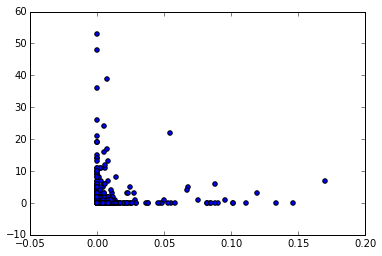

In [43]:
plt.scatter(conflicts.Predicted_Conflicts, conflicts.Observed_MIDs)

In [44]:
conflicts.corr()

,Predicted_Conflicts,Observed_MIDs,Const.,MID_Dummy,PredictedConflicts_Dummy
Predicted_Conflicts,1.000000,0.067522,NaN,0.102247,0.419952
Observed_MIDs,0.067522,1.000000,NaN,0.506119,0.065795
Const.,NaN,NaN,NaN,NaN,NaN
MID_Dummy,0.102247,0.506119,NaN,1.000000,0.096070
PredictedConflicts_Dummy,0.419952,0.065795,NaN,0.096070,1.000000


In [45]:
conflicts["Const."] = 1

In [46]:
lm = sm.OLS(conflicts.Observed_MIDs, conflicts[["Const.", "Predicted_Conflicts"]])
fit = lm.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:          Observed_MIDs   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.70
Date:                Wed, 09 Dec 2015   Prob (F-statistic):           0.000636
Time:                        15:01:39   Log-Likelihood:                -5917.4
No. Observations:                2556   AIC:                         1.184e+04
Df Residuals:                    2554   BIC:                         1.185e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Const.                  0.3922    

In [47]:
with open("lm_ex_3.pickle", "wb") as f:
    pickle.dump(fit, f)

In [48]:
conflicts["MID_Dummy"] = 0
conflicts["MID_Dummy"][conflicts.Observed_MIDs > 0] = 1

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [49]:
logit = sm.Logit(conflicts.MID_Dummy, conflicts[["Const.", "Predicted_Conflicts"]])
fit = logit.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.331459
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              MID_Dummy   No. Observations:                 2556
Model:                          Logit   Df Residuals:                     2554
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Dec 2015   Pseudo R-squ.:                0.009903
Time:                        15:03:02   Log-Likelihood:                -847.21
converged:                       True   LL-Null:                       -855.68
                                        LLR p-value:                 3.843e-05
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Const.                 -2.2005      0.067    -33.018      0.000        -2.331    -2.070
Pr

In [50]:
with open("logit_ex_3.pickle", "wb") as f:
    pickle.dump(fit, f)

In [51]:
conflicts["PredictedConflicts_Dummy"] = 0
conflicts["PredictedConflicts_Dummy"][conflicts.Predicted_Conflicts>0] = 1

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [52]:
logit = sm.Logit(conflicts.MID_Dummy, conflicts[["Const.", "PredictedConflicts_Dummy"]])
fit = logit.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.330649
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              MID_Dummy   No. Observations:                 2556
Model:                          Logit   Df Residuals:                     2554
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Dec 2015   Pseudo R-squ.:                 0.01232
Time:                        15:03:15   Log-Likelihood:                -845.14
converged:                       True   LL-Null:                       -855.68
                                        LLR p-value:                 4.388e-06
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Const.                      -2.3036      0.076    -30.357      0.000        -2.4

In [60]:
conflicts.to_csv("transfer/conflict_df_ex3.csv")

# Top conflict dyads

In [58]:
conflict_pairs = conflicts[["Source_Country", "Target_Country", 
                            "Predicted_Conflicts", "Observed_MIDs"]].copy()

In [59]:
conflict_pairs.sort("Predicted_Conflicts", ascending=False).head(10).to_clipboard()

In [56]:
conflict_pairs.sort("Observed_MIDs", ascending=False).head(10).to_clipboard()